# Ice Cream Revenue Prediction 🍦

## Introduction
Understanding how temperature influences ice cream sales is an important business problem. For ice cream vendors and companies, being able to **predict daily revenue based on weather conditions** can help optimize supply chains, manage inventory, and improve profit margins.  

In this project, we use a dataset that records **temperature and ice cream revenue** to build a predictive model. The notebook covers the full workflow:
- Framing the problem and exploring the dataset  
- Visualizing relationships between temperature and revenue  
- Splitting the dataset into training and testing sets  
- Building and evaluating a regression model  

## Problem Statement
The objective of this notebook is to **predict daily ice cream revenue from temperature data**. By the end, we aim to have a regression model that not only fits the data but also generalizes well to unseen values.

---


#### IMPORT LIBRARIES AND DATASETS

Here, we import the necessary Python libraries for data analysis, visualization, and machine learning. We also load the dataset containing temperature and revenue values to begin our exploration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sales_df = pd.read_csv("IceCreamData.csv")

In [3]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
sales_df['Temperature'].mean()


22.232225113404002

In [9]:
sales_df['Revenue'].mean()


521.57077669154

In [10]:
sales_df['Temperature'].max()


45.0

In [11]:
sales_df['Revenue'].max()

1000.0

#### DATA VISUALIZATION

In this step, we create plots to visualize the relationship between temperature and revenue. Visualization helps identify trends, correlations, and potential outliers, providing intuition for model building.

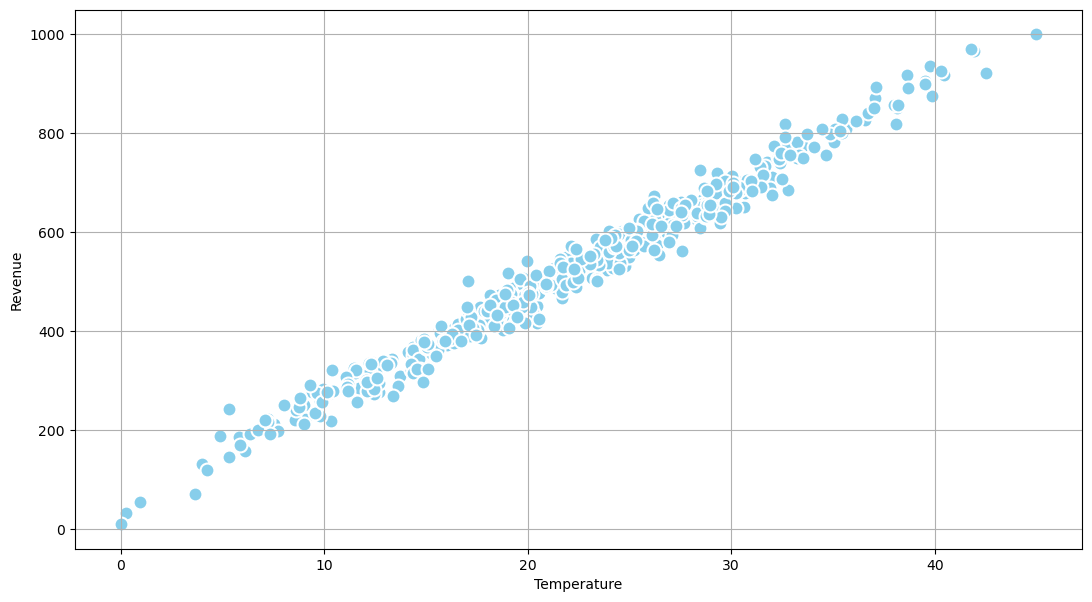

In [12]:
x=sales_df['Temperature']
y=sales_df['Revenue']
plt.figure(figsize=[13,7])
plt.grid()
# Create the scatter plot with outlined markers
plt.scatter(x, y, 
            facecolors='skyblue',  # Color of the marker's interior
            edgecolors='white',    # Color of the outline
            linewidths=1.5,        # Width of the outline
            s=100)                 # Size of the markers
plt.xlabel("Temperature")
plt.ylabel("Revenue")

plt.show()

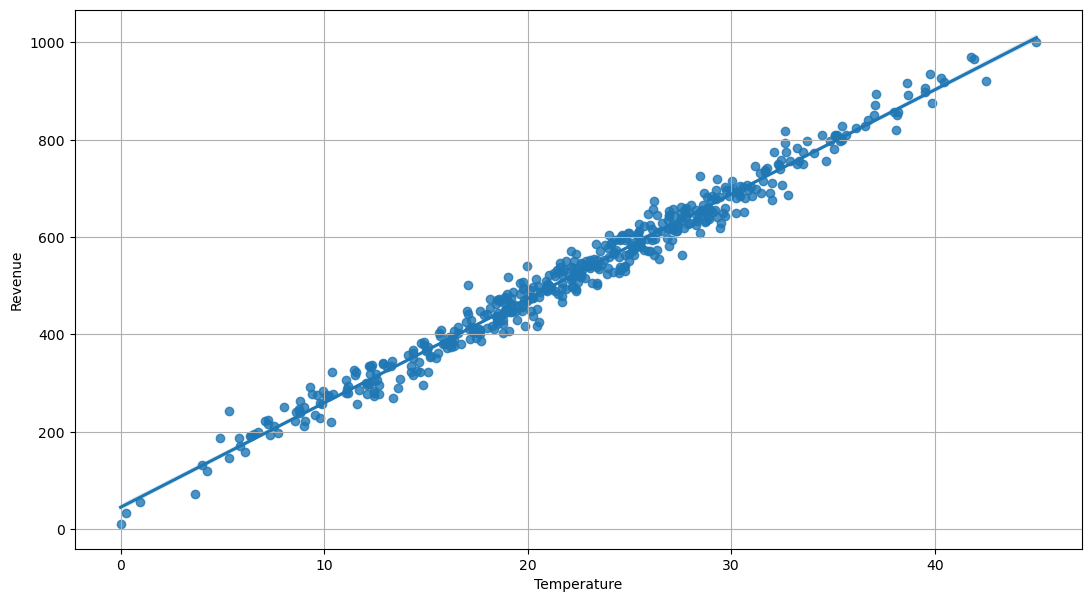

In [13]:
plt.figure(figsize=[13,7])
sns.regplot(x='Temperature',y="Revenue",data=sales_df)
plt.grid()

#### TESTING AND TRAINING DATASET

The dataset is divided into training and testing subsets. Training data is used to fit the model, while testing data is reserved for evaluating performance on unseen data, ensuring generalization.

In [14]:
x=np.array(x)
y=np.array(y)

In [15]:
# reshaping the array from (500,) to (500, 1)
x = x.reshape(-1,1)
print(x.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape

(350, 1)

#### TRAIN THE MODEL

We set up a simple linear regression model to capture the relationship between temperature (independent variable) and ice cream revenue (dependent variable).

In [18]:
from sklearn.linear_model import LinearRegression

SLR=LinearRegression()

SLR.fit(x,y)


LinearRegression()

In [19]:
print('Linear Model Coeff(m)', SLR.coef_)
print('Linear Model Coeff(b)', SLR.intercept_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


#### EVALUATION

We assess the accuracy of the model by comparing predicted revenue against actual revenue. Key evaluation metrics (e.g., Mean Squared Error, R²) are calculated to measure performance.

Text(0.5, 1.0, 'Temperature vs Revenue + SLR')

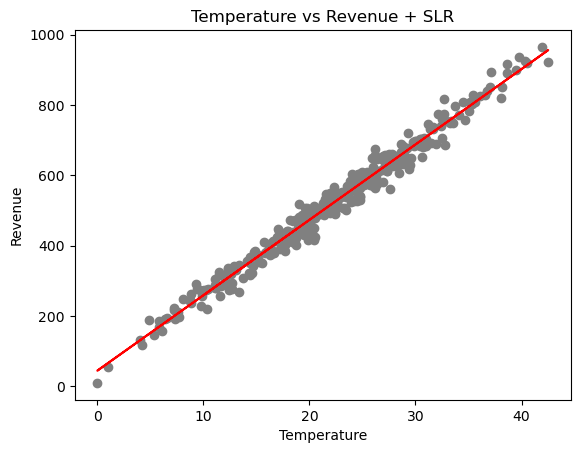

In [20]:
plt.scatter(x_train,y_train,color='gray')
plt.plot(x_train,SLR.predict(x_train),color='r')
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Temperature vs Revenue + SLR")

In [21]:
accuracy_LinearRegression = SLR.score(x_test, y_test)
accuracy_LinearRegression

0.9797374551282975

__98.17 % Accuracy in model__

Text(0.5, 1.0, 'Test Temperature vs Test Revenue + SLR')

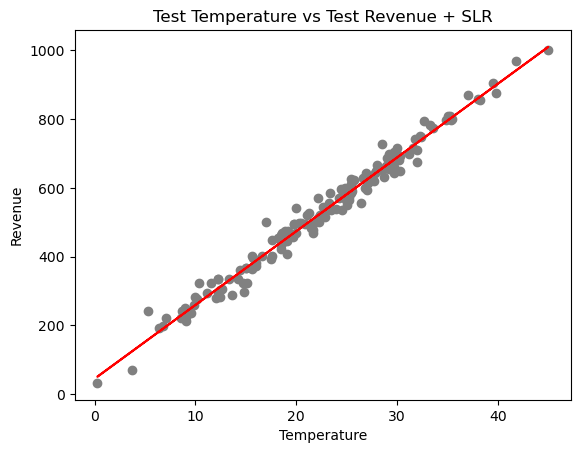

In [22]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,SLR.predict(x_test),color='r')
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Test Temperature vs Test Revenue + SLR")

#### Making Future Predictions (Scenario Testing)

The model is applied to new, unseen temperature values to simulate future scenarios. This step demonstrates the practical use of the model in forecasting sales under different weather conditions.

In [23]:
# Use the trained model to generate predictions

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = SLR.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[473.7037773]]


In [24]:
temp=np.array([30])
temp0=temp.reshape(-1,1)

temp=np.array([40])
temp1=temp.reshape(-1,1)

temp=np.array([10])
temp2=temp.reshape(-1,1)

Revenue=SLR.predict(temp0)
print(Revenue)
Revenue=SLR.predict(temp1)
print(Revenue)
Revenue=SLR.predict(temp2)
print(Revenue)

[[688.14003241]]
[[902.57628752]]
[[259.2675222]]
